<a href="https://colab.research.google.com/github/armandoordonez/deeplearning/blob/main/2_Tensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scalars (0D tensors)

In [20]:
# Este notebook muestra los tipos de tensores que existen en el mundo de deep learning
# Importamos la libreria numpy

import numpy as np
x = np.array(12)

In [21]:
# imprimimos el tensor
x
# esta linea imprime el tensor

array(12)

In [22]:
# imprimimos el numero de dimensiones del tensor
x.ndim

0

Vectors (1D tensors)

In [23]:
# creamos un vector
x = np.array([12, 3, 6, 14])

In [24]:
# imprimimos el vector
x

array([12,  3,  6, 14])

In [25]:
# imprimimos el numero  de dimensiones del vector

x.ndim
# 5-dimensional vector.  A 5D vector has only one axis and has five dimensions along its axis,

1

Matrices (2D tensors)

In [26]:
#   esta linea   

x = np.array([[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]])

In [27]:
# imprimimos el shape del tensor
x.shape

(3, 5)

In [28]:
x.ndim

2

In [29]:
x = np.array([[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]]])

In [30]:
# imprimimos el shape del tensor
x.shape

(3, 3, 5)

In [31]:
# imprimo el numero de dimensiones del tensor
x.ndim

3

In [32]:
# Importamos la libreria keras
from keras.datasets import mnist

# cargamos el dataset mnist este dataset contiene imagenes de digitos escritos a mano
# el dataset contiene 60,000 imagenes de entrenamiento y 10,000 imagenes de test
# cada imagen tiene un tamaño de 28x28 pixeles
# cada imagen tiene un solo canal de color
# cada imagen es un tensor de rango 3

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [33]:
print(train_images.ndim)

3


In [34]:
train_images.shape

(60000, 28, 28)

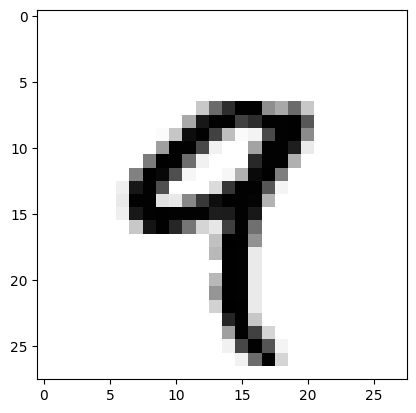

In [35]:
digit = train_images[4]

import matplotlib.pyplot as plt

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [36]:
# seleccionamos un slice de la imagen

my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [37]:
#  seleccionamos un slice de la imagen

my_slice = train_images[10:100, :, :] # Igual al anterior
my_slice.shape


(90, 28, 28)

In [38]:
my_slice = train_images[10:100, 0:28, 0:28] # Igual al anterior
my_slice.shape

(90, 28, 28)

In [39]:
# vemos las dimensiones de los tensores
my_slice.ndim

3

14 × 14 pixels in the bottom-right corner of all images, you
do this:

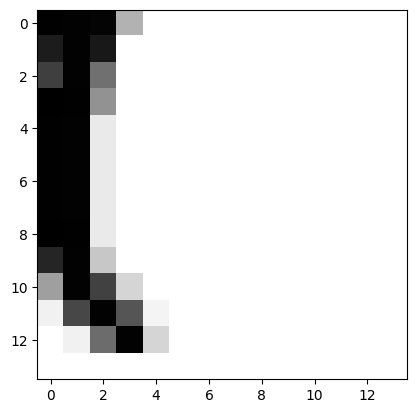

In [40]:
my_slice = train_images[4, 14:, 14:]

digit = my_slice

import matplotlib.pyplot as plt

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Indica una posición relativa al final del eje actual. Para recortar las imágenes en parches de 14 × 14 píxeles centrados en el medio, haga lo siguiente

In [41]:
my_slice = train_images[:, 7:-7, 7:-7]

In [42]:
batch = train_images[:128] # Batch 1

In [44]:
# seleccionamos un batch de imagenes de 128 imagenes

batch = train_images[128:256] # Batch 2 batchN = train_images[128 * n:128 * (n + 1)] (axis 0) is called the batch axis or batch dimension.

In [45]:
# esta funcion es una funcion de activacion
# esta funcion toma un tensor y lo transforma en otro tensor
# la funcion relu es max(x, 0)


def naive_relu(x):
  assert len(x.shape) == 2
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i, j], 0)
      return x

In [46]:
def naive_add(x, y):
  assert len(x.shape) == 2
  assert x.shape == y.shape
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[i, j]
      return x

In [48]:


import numpy as np

x = np.array([12, 3, 6, 14])
y = np.array([2, 3, 6, 14])


z = x + y

print("z original:", z)
# esta funcion np.maximum(x, 0.) compara cada elemento de x con 0 y devuelve el mayor de los dos
# esta funcion es una funcion de activacion
# esta funcion toma un tensor y lo transforma en otro tensor
# la funcion relu es max(x, 0)

z = np.maximum(z, 0.)
print("z con relu: ",)

z original: [14  6 12 28]
z con relu: 


Broadcast

In [25]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)
z

array([[[[0.75552863, 0.90867052, 0.74717721, ..., 0.66016738,
          0.56788009, 0.98621079],
         [0.92038699, 0.30813736, 0.76522549, ..., 0.81998059,
          0.55391621, 0.93091073],
         [0.45795962, 0.75651653, 0.808668  , ..., 0.05575452,
          0.78798218, 0.81434989],
         ...,
         [0.95684354, 0.97314027, 0.67813533, ..., 0.24867166,
          0.92238629, 0.96312038],
         [0.46265428, 0.58008003, 0.91251585, ..., 0.90125486,
          0.77729746, 0.5228687 ],
         [0.86199632, 0.97854125, 0.75730621, ..., 0.82593291,
          0.44107884, 0.57551178]],

        [[0.39848036, 0.8148099 , 0.91911883, ..., 0.88901601,
          0.09911397, 0.90551961],
         [0.92038699, 0.30813736, 0.75802385, ..., 0.23507668,
          0.2620825 , 0.86226893],
         [0.45795962, 0.92899459, 0.61285043, ..., 0.10010155,
          0.99361688, 0.81434989],
         ...,
         [0.94655767, 0.97314027, 0.11309384, ..., 0.20782177,
          0.92238629, 0.5

Reshape

In [26]:
x= np.array([[0., 1.],
[2., 3.],
[4., 5.]])
print(x.shape)

(3, 2)


In [27]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [28]:
x = x.reshape((2, 3))
x


array([[0., 1., 2.],
       [3., 4., 5.]])

In [29]:
#Transpose

x = np.zeros((300, 20))
x = np.transpose(x)
print(x.shape)

(20, 300)
